In [10]:
import os
import platform
import pandas as pd
import cv2 as cv
import json
import numpy as np
import tensorflow as tf


from tqdm import tqdm
from glob import glob, iglob
from matplotlib import image, pyplot as plt, patches

from sys import path
path.insert(0, '..')
import utill

In [16]:
with open('../assets/dataset/gt_train.txt') as file:
  data = json.load(file)

with open('../assets/dataset/new_data_train.txt') as file:
  data_train = json.load(file)

with open('../assets/dataset/new_data_val.txt') as file:
  data_val = json.load(file)

print(f'Data length: {len(data)}')
print(f'Data train length: {len(data_train)}')
print(f'Data val length: {len(data_val)}')


Data length: 110000
Data train length: 67201
Data val length: 860


In [65]:
def make_class(data, class_name):
  nclass = []
  for idx in tqdm(range(len(data))):
    for cls in data[idx]['objects']:
      if cls['class'] == class_name:
        nclass.append(data[idx])
        break

  return nclass

new_class = make_class(data, 'work_van')

print(len(new_class))
# print([obj['filename'] for obj in new_class[:100]])


100%|██████████| 110000/110000 [00:00<00:00, 686608.49it/s]

8139


In [66]:
with open('../assets/dataset/class/work_van.txt', 'w') as file:
    json.dump(new_class, file)

In [18]:
def export_gt(image_notation, image_folder_path, export_path):
  for line in image_notation:
    filename = os.path.join(image_folder_path, line['filename'])
    img = line['image-size']
    filename = filename.split(os.sep)[-1].split('.')[0]
    output_path = os.path.join(export_path, filename+'.txt')

    with open(output_path, 'w') as gt_file:
      for object in line['objects']:
        x1 = round(object['x'] * img[1])
        y1 = round(object['y'] * img[0])
        x2 = round(x1 + (object['w'] * img[1]))
        y2 = round(y1 + (object['h'] * img[0]))
        gt_file.write('{0} {1} {2} {3} {4}\n'.format(object['class'], x1, y1, x2, y2))

{'pedestrian': 266, 'bicycle': 141, 'pickup_truck': 355, 'single_unit_truck': 121, 'non-motorized_vehicle': 105, 'car': 2068, 'articulated_truck': 130, 'motorized_vehicle': 280, 'work_van': 139, 'bus': 146, 'motorcycle': 110}
[('non-motorized_vehicle', 105), ('motorcycle', 110), ('single_unit_truck', 121), ('articulated_truck', 130), ('work_van', 139), ('bicycle', 141), ('bus', 146), ('pedestrian', 266), ('motorized_vehicle', 280), ('pickup_truck', 355), ('car', 2068)]


/home/hadioz/development/python/counting-car/notebook/../utill.py:475: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(window_title)


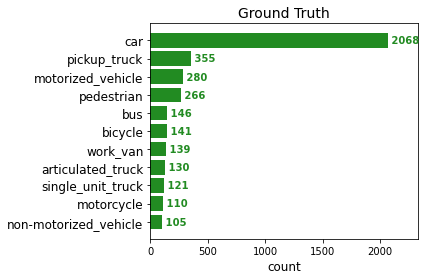

In [23]:
dr_files_list = sorted(glob(os.path.join('../assets/gt_train', '*.txt')))
classes = {}
for text_file in dr_files_list:
  lines = utill.read_txt_to_list(text_file)
  for line in lines:
    class_name = line.split()[0]
    if class_name in classes:
      classes[class_name] += 1
    else:
      classes[class_name] = 1

cl_name = list(classes.keys())
print(classes)

utill.draw_plot_func(
                classes,
                len(classes),
                "gt-info",
                "Ground Truth",
                "count",
                "./ground-truth-info.jpeg",
                True,
                "forestgreen",
                '',)

In [22]:
export_gt(data_val, '../assets/dataset/train', '../assets/gt_train')